In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as smf

In [54]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [56]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [57]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

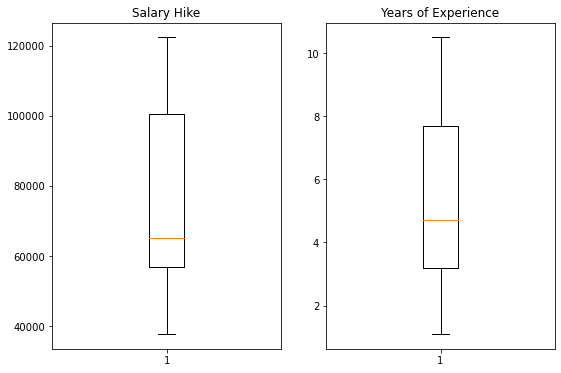

In [58]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')
plt.show()


In [59]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

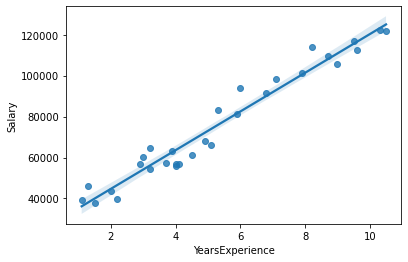

In [60]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])  

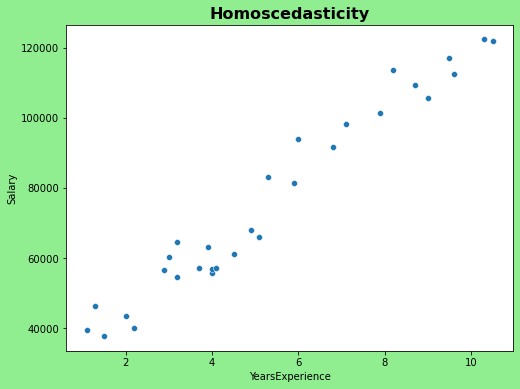

In [61]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [62]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

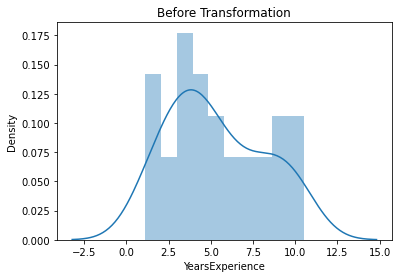

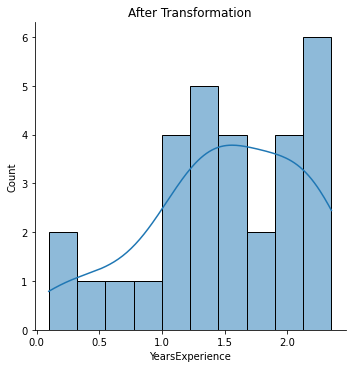

In [63]:
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

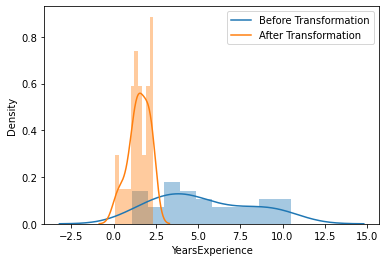

In [64]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

In [65]:
smf.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

AttributeError: module 'statsmodels' has no attribute 'qqplot'

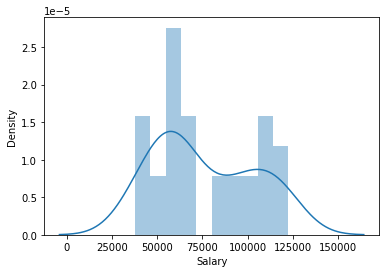

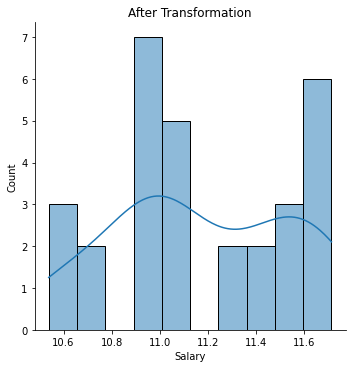

In [66]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

In [67]:
smf.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

AttributeError: module 'statsmodels' has no attribute 'qqplot'

In [68]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        15:46:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           7.58e-19
Time:                        15:46:07   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           6.37e-18
Time:                        15:46:08   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           7.40e-16
Time:                        15:46:08   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [74]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [75]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

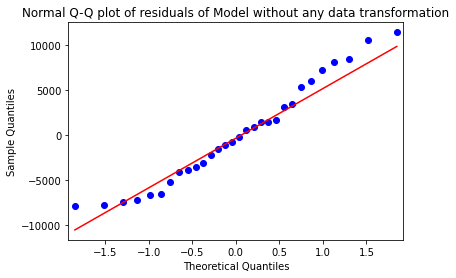

In [76]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [77]:
Salary = 25792.200199 + 9449.962321*(8)  # lets years of experience as 8
Salary

101391.898767

In [78]:
newdata=pd.Series([8,9,5,10])

In [79]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,8
1,9
2,5
3,10


In [80]:
model.predict(data_pred)

0    101391.898770
1    110841.861092
2     73042.011806
3    120291.823413
dtype: float64

In [81]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

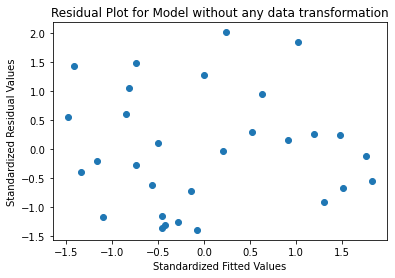

In [82]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
model1_pred_y =np.square(model1.predict(data['YearsExperience']))
model2_pred_y =pow(model2.predict(data['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(data['YearsExperience']))

In [85]:
model1_rmse =np.sqrt(mean_squared_error(data['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174306 
model2= 6232.815455835857 
model3= 7219.716974372746


In [86]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

In [ ]:
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = data.YearsExperience
predicted2['Salary'] = data.Salary
predicted2['Predicted_Salary_Hike'] = [pd.DataFrame(model.predict('predicted.YearsExperience'))]
predicted2

In [100]:
predicted2

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


ERROR! Session/line number was not unique in database. History logging moved to new session 71
